<h2 align="center"> Univariate Linear Regression </h2>

### Step1: Load the Data and Libraries
---

In [2]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


### Step 2: Visualize the Data
---

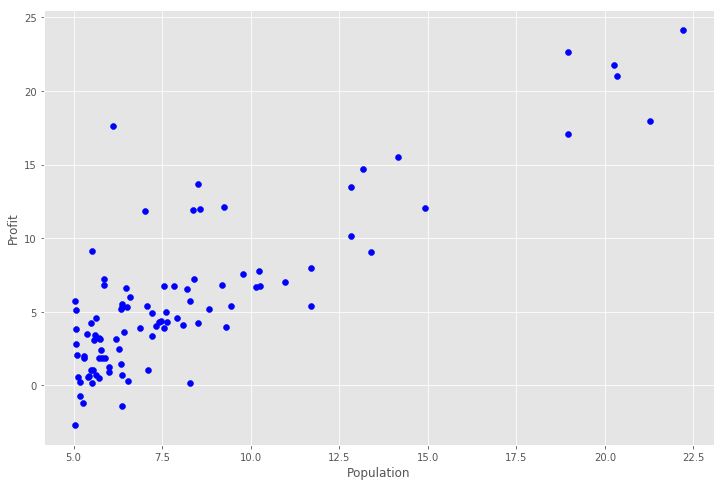

In [6]:
plt.scatter(data[['Population']], data[['Profit']], color="blue")
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

### Step 3: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [7]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (np.array(y_pred) - np.array(y)) ** 2
    
    return 1/(2*m) * np.sum(error)

In [8]:
m = data[['Population']].size
X = np.append(np.ones((m, 1)), data[['Population']].values.reshape(m, 1), axis=1)
y = data[['Profit']].values.reshape(m, 1)
theta = np.zeros((2, 1))

cost_function(X, y, theta)

32.072733877455676

### Step 4: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [9]:
def gradient_descent(X, y, theta, alpha, itr):
    m = len(y)
    costs = [] #for convergence and vis how the model is learning
    for i in range(itr):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [10]:
theta, costs = gradient_descent(X, y, theta, 0.01, 2000)
print(f"h(x) = {round(theta[0,0],2)} + {round(theta[1,0],2)}x1")

h(x) = -3.79 + 1.18x1


### Step 5: Visualising the Cost Function $J(\theta)$
---

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

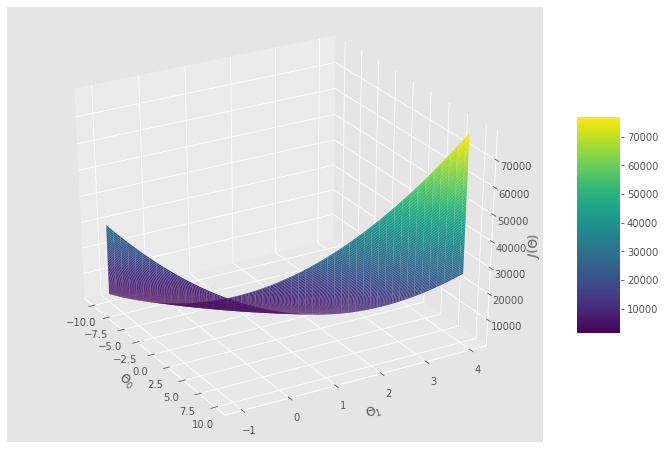

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

### Step 6: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

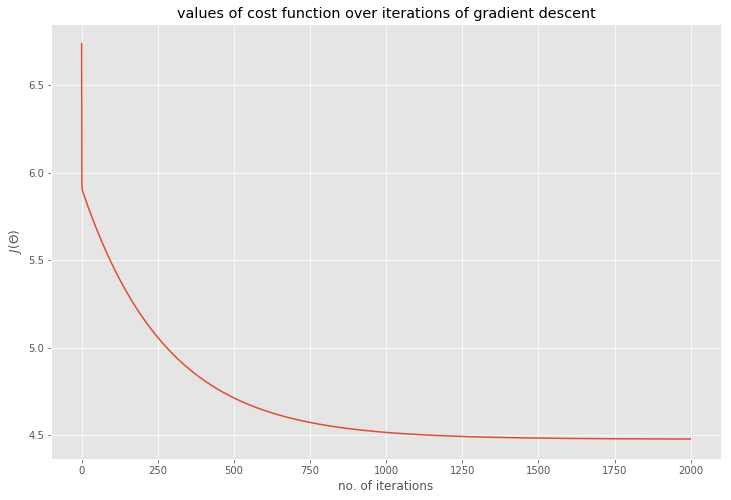

In [14]:
plt.plot(costs)
plt.xlabel("no. of iterations")
plt.ylabel("$J(\Theta)$")
plt.title("values of cost function over iterations of gradient descent")
plt.show()

### Step 7: Training Data with Linear Regression Fit
---

In [15]:
theta = np.squeeze(theta)
theta

array([-3.78806857,  1.18221277])

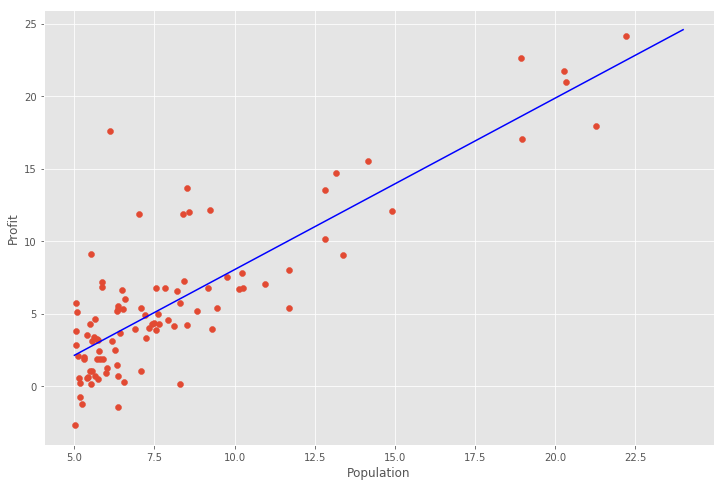

In [18]:
plt.scatter(data[['Population']], data[['Profit']])
reg_line_x = np.array([x for x in range(5, 25)])
reg_line_y = theta[1] * reg_line_x + theta[0]
plt.plot(reg_line_x, reg_line_y, color='b')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

### Step 8: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [19]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [23]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
y_pred_1

9407.825263063976

In [24]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
y_pred_2

60242.97457763119